In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest,chi2,RFE
from sklearn.ensemble import RandomForestClassifier

In [3]:
df = pd.read_csv("Heart_Disease_Prediction.csv")
print(df.shape)

df.head(5)

(270, 14)


,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [4]:
label = df["Heart Disease"]
df.drop("Heart Disease", axis=1, inplace=True)

Absence     150
Presence    120
Name: Heart Disease, dtype: int64


<AxesSubplot:>

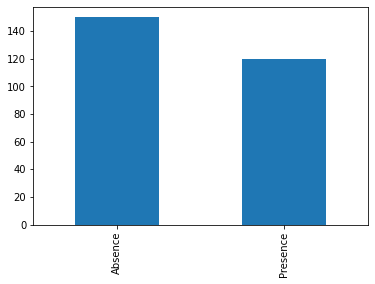

In [5]:
print(label.value_counts())
label.value_counts().plot(kind="bar")

In [6]:
categorical_features = ["Sex", "Chest pain type", "FBS over 120", "EKG results", "Exercise angina", "Slope of ST", "Number of vessels fluro", "Thallium"]
df[categorical_features] = df[categorical_features].astype("category")

In [7]:
continuous_features = set(df.columns) - set(categorical_features)
scaler = MinMaxScaler()
df_norm = df.copy()
df_norm[list(continuous_features)] = scaler.fit_transform(df[list(continuous_features)])

In [8]:
X_new = SelectKBest(k=5, score_func=chi2).fit_transform(df_norm, label)

In [11]:
rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=5)
X_new = rfe.fit_transform(df_norm, label)
X_new

array([[4.        , 0.44748858, 0.29007634, 0.38709677, 3.        ],
       [3.        , 1.        , 0.67938931, 0.25806452, 7.        ],
       [2.        , 0.30821918, 0.53435115, 0.0483871 , 7.        ],
       ...,
       [2.        , 0.38356164, 0.6259542 , 0.20967742, 3.        ],
       [4.        , 0.15068493, 0.58778626, 0.06451613, 6.        ],
       [4.        , 0.3652968 , 0.28244275, 0.24193548, 3.        ]])

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

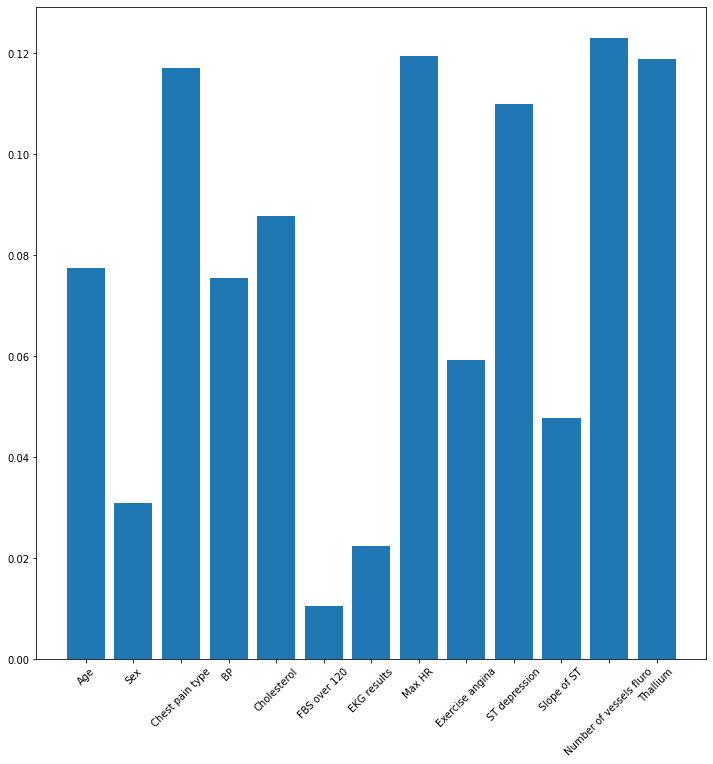

In [12]:
clf = RandomForestClassifier()
clf.fit(df_norm, label)
# create a figure to plot a bar, where x axis is features, and Y indicating the importance of each feature
plt.figure(figsize=(12,12))
plt.bar(df_norm.columns, clf.feature_importances_)
plt.xticks(rotation=45)